In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [113]:
df = pd.read_csv('../../thesis/references/TestAccurracy.csv', sep=';')
df.head()

,id,onset_date,y_pred,y_true,pred_date,pred_ts,error,error_abs
0,34,30.05.1985,1.2358,1,05/29,12787200,0.2358,0.2358
1,34,30.05.1985,1.5560,2,05/28,12700800,-0.4440,0.4440
2,34,30.05.1985,2.0656,3,05/27,12614400,-0.9344,0.9344
3,34,30.05.1985,3.1431,4,05/26,12528000,-0.8569,0.8569
4,34,30.05.1985,4.2556,5,05/25,12441600,-0.7444,0.7444


In [114]:
df = df.sort_values(by='pred_date')

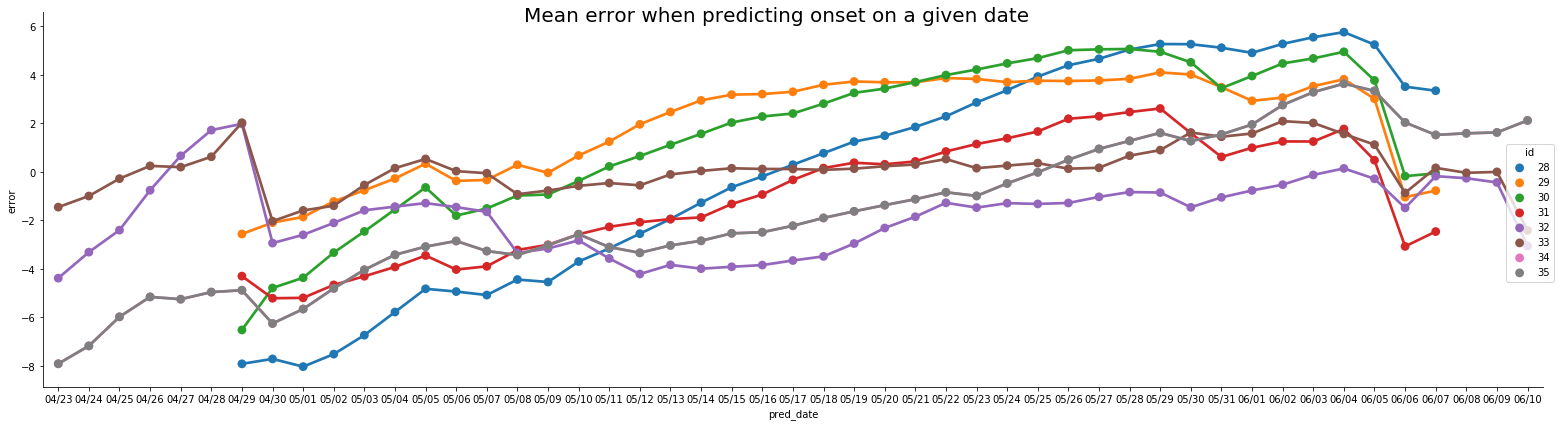

In [115]:
g = sns.factorplot(data=df, x='pred_date', y='error', hue='id', aspect=3.5, size=6, ci=None)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean error when predicting onset on a given date', size=20)

plt.tight_layout()
plt.savefig('prediction_errors.png')

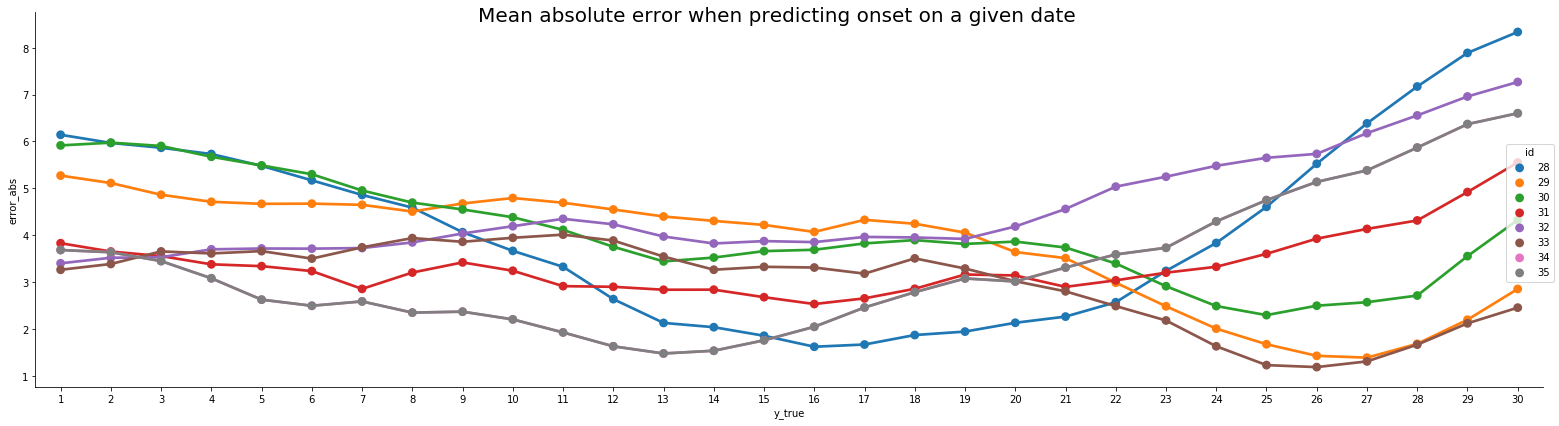

In [116]:
g = sns.factorplot(data=df, x='y_true', y='error_abs', hue='id', aspect=3.5, size=6, ci=None)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)

plt.tight_layout()
plt.savefig('prediction_accuracy_offset.png')

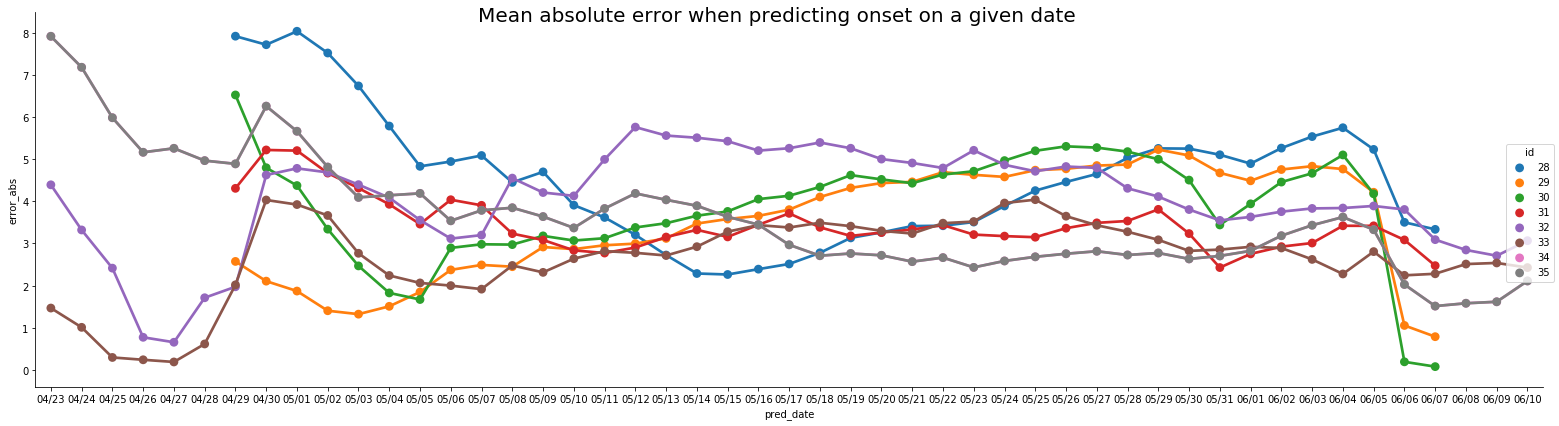

In [117]:
g = sns.factorplot(data=df, x='pred_date', y='error_abs', hue='id', aspect=3.5, size=6, ci=None)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)

plt.tight_layout()
plt.savefig('prediction_accuracy_dates.png')